In [11]:
using Revise
using MGVInference

In [12]:
fft_gp_model = "../test/test_models/fft_gp.jl"
open(fft_gp_model, "r") do io
    map(println, readlines(io))
end
include(fft_gp_model)

# This file is a part of MGVInference.jl, licensed under the MIT License (MIT).

import Base: *, adjoint
import AbstractFFTs
import FFTW: plan_r2r, DHT
import ForwardDiff
import Random: randn, MersenneTwister
import Distributions: Normal
import ValueShapes: NamedTupleDist
import Zygote
import LinearAlgebra: Diagonal

_dims = 40
_k = [i < _dims / 2 ? i : _dims-i for i = 0:_dims-1]

# Define the harmonic transform operator as a matrix-like object
_ht = plan_r2r(zeros(_dims), DHT)

# Unfortunately neither Zygote nor ForwardDiff support planned Hartley
# transformations. While Zygote does not support AbstractFFTs.ScaledPlan,
# ForwardDiff does not overload the appropriate methods from AbstractFFTs.
function _plan_dual_product(trafo::AbstractFFTs.Plan, u::Vector{ForwardDiff.Dual{T, V, N}}) where {T, V, N}
    # Unpack AoS -> SoA
    vs = ForwardDiff.value.(u)
    ps = mapreduce(ForwardDiff.partials, hcat, u)
    # Actual computation
    val = trafo * vs
    jvp = [trafo*t[:] for t in eachro

In [13]:
using Distributions
using Random
using ValueShapes
using LinearAlgebra
using Optim
using Plots

In [14]:
rng = MersenneTwister(157);

In [15]:
data = rand(rng, model(true_params), 1)[1];

In [16]:
_common_grid = [1:_dims...];

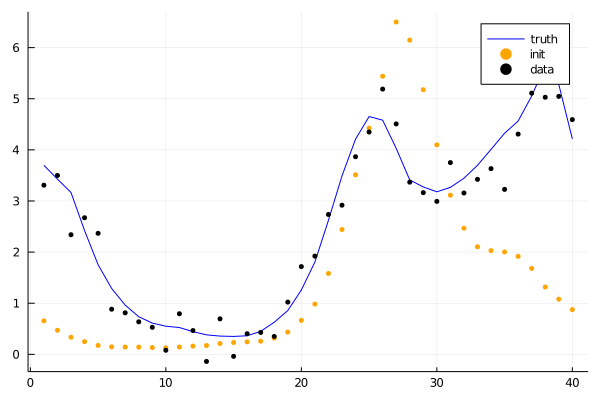

In [17]:
init_plots =() -> let
    truth = _mean(true_params)
    plot!(_common_grid, truth, markercolor=:blue, linecolor=:blue, label="truth")
    scatter!(_common_grid, _mean(starting_point), markercolor=:orange, markerstrokewidth=0, markersize=3, label="init")
    scatter!(_common_grid, MGVInference.unshaped(data), markercolor=:black, markerstrokewidth=0, markersize=3, label="data")
end
plot()
init_plots()

In [18]:
first_iteration = mgvi_kl_optimize_step(rng,
                                        model, data,
                                        starting_point;
                                        jacobian_func=FwdRevADJacobianFunc,
                                        residual_sampler=ImplicitResidualSampler)

display(hcat(first_iteration.result, true_params))

40×2 Array{Float64,2}:
  0.359356    0.48151
 -0.74043    -0.564916
  1.9949      1.63042
 -0.618264   -1.14073
 -0.299737    0.867529
 -0.240844    0.0598623
 -1.27714    -1.64938
 -0.417408   -0.552528
  0.326994   -0.472529
 -0.28768    -0.468033
  0.0973785  -0.200177
  0.135513   -0.944585
 -0.121626    0.75603
  ⋮          
  0.0663896  -0.268811
  0.237797    0.0891861
 -0.0780824  -2.73701
  0.153963   -1.57267
  0.21429    -0.859427
 -0.98107    -0.795277
  0.178086   -0.75824
 -0.0088104  -0.572864
 -0.393733   -0.559156
  0.331748    0.841274
  0.479155    0.298653
  1.37382     1.25313

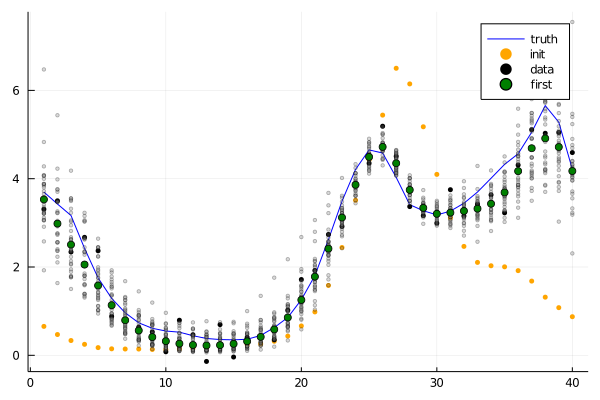

In [19]:
plot_iteration = (params, label) -> let
    #error_mat = mgvi_kl_errors(full_model, params)
    #display(error_mat)
    #errors = sqrt.(error_mat[diagind(error_mat)])
    #yerr = abs.(line(common_grid, params+errors) - line(common_grid, params-errors))
    #scatter!(common_grid, line(common_grid, params), markercolor=:green, label=label, yerr=yerr)
    for sample in eachcol(params.samples)
        scatter!(_common_grid, _mean(Vector(sample)), markercolor=:gray, markeralpha=0.3, markersize=2, label=nothing)
    end
    scatter!(_common_grid, _mean(params.result), markercolor=:green, label=label)    
end
    
plot()
init_plots()
plot_iteration(first_iteration, "first")

In [20]:
plot_iteration_light = (params, counter) -> let
    scatter!(_common_grid, _mean(params.result), markercolor=:green, markersize=3, markeralpha=2*atan(counter/18)/π, label=nothing)
end

#41 (generic function with 1 method)

55.7336786382642

40×2 Array{Float64,2}:
  0.359356    0.48151
 -0.74043    -0.564916
  1.9949      1.63042
 -0.618264   -1.14073
 -0.299737    0.867529
 -0.240844    0.0598623
 -1.27714    -1.64938
 -0.417408   -0.552528
  0.326994   -0.472529
 -0.28768    -0.468033
  0.0973785  -0.200177
  0.135513   -0.944585
 -0.121626    0.75603
  ⋮          
  0.0663896  -0.268811
  0.237797    0.0891861
 -0.0780824  -2.73701
  0.153963   -1.57267
  0.21429    -0.859427
 -0.98107    -0.795277
  0.178086   -0.75824
 -0.0088104  -0.572864
 -0.393733   -0.559156
  0.331748    0.841274
  0.479155    0.298653
  1.37382     1.25313

39.33143958564899

40×2 Array{Float64,2}:
  0.424595    0.48151
 -0.663773   -0.564916
  1.89071     1.63042
 -0.543445   -1.14073
 -0.321314    0.867529
 -0.192029    0.0598623
 -1.28824    -1.64938
 -0.428977   -0.552528
  0.328815   -0.472529
 -0.296983   -0.468033
  0.0963357  -0.200177
  0.124292   -0.944585
 -0.122572    0.75603
  ⋮          
  0.068112   -0.268811
  0.250141    0.0891861
 -0.0515698  -2.73701
  0.167046   -1.57267
  0.239014   -0.859427
 -1.0048     -0.795277
  0.186755   -0.75824
 -0.0637775  -0.572864
 -0.386527   -0.559156
  0.361352    0.841274
  0.497669    0.298653
  1.28166     1.25313

35.745629340258375

40×2 Array{Float64,2}:
  0.425044    0.48151
 -0.65795    -0.564916
  1.90323     1.63042
 -0.621377   -1.14073
 -0.312209    0.867529
 -0.177939    0.0598623
 -1.28583    -1.64938
 -0.436875   -0.552528
  0.340941   -0.472529
 -0.292054   -0.468033
  0.0969513  -0.200177
  0.121306   -0.944585
 -0.129139    0.75603
  ⋮          
  0.0651384  -0.268811
  0.253158    0.0891861
 -0.0527833  -2.73701
  0.164959   -1.57267
  0.216547   -0.859427
 -1.02733    -0.795277
  0.208334   -0.75824
 -0.0659071  -0.572864
 -0.316979   -0.559156
  0.358874    0.841274
  0.461681    0.298653
  1.28794     1.25313

36.54916248969951

40×2 Array{Float64,2}:
  0.419808    0.48151
 -0.66783    -0.564916
  1.91836     1.63042
 -0.551238   -1.14073
 -0.328866    0.867529
 -0.211883    0.0598623
 -1.31615    -1.64938
 -0.412223   -0.552528
  0.329063   -0.472529
 -0.294777   -0.468033
  0.098763   -0.200177
  0.124413   -0.944585
 -0.12566     0.75603
  ⋮          
  0.0665122  -0.268811
  0.25196     0.0891861
 -0.0521831  -2.73701
  0.16298    -1.57267
  0.235931   -0.859427
 -1.02527    -0.795277
  0.171025   -0.75824
 -0.0755311  -0.572864
 -0.360587   -0.559156
  0.340263    0.841274
  0.495369    0.298653
  1.29521     1.25313

36.50477392547758

40×2 Array{Float64,2}:
  0.433427    0.48151
 -0.650093   -0.564916
  1.85185     1.63042
 -0.574303   -1.14073
 -0.331104    0.867529
 -0.226953    0.0598623
 -1.30489    -1.64938
 -0.449937   -0.552528
  0.331743   -0.472529
 -0.293455   -0.468033
  0.0911018  -0.200177
  0.125143   -0.944585
 -0.122615    0.75603
  ⋮          
  0.0730042  -0.268811
  0.25209     0.0891861
 -0.0464531  -2.73701
  0.175685   -1.57267
  0.235187   -0.859427
 -0.995159   -0.795277
  0.21547    -0.75824
 -0.0165306  -0.572864
 -0.38977    -0.559156
  0.392154    0.841274
  0.470389    0.298653
  1.26421     1.25313

38.6588162342281

40×2 Array{Float64,2}:
  0.436857    0.48151
 -0.642037   -0.564916
  1.83269     1.63042
 -0.538719   -1.14073
 -0.321968    0.867529
 -0.211585    0.0598623
 -1.31763    -1.64938
 -0.401497   -0.552528
  0.330454   -0.472529
 -0.28731    -0.468033
  0.0868094  -0.200177
  0.131926   -0.944585
 -0.127436    0.75603
  ⋮          
  0.0729678  -0.268811
  0.245507    0.0891861
 -0.0533197  -2.73701
  0.166066   -1.57267
  0.234337   -0.859427
 -1.02409    -0.795277
  0.151122   -0.75824
 -0.0516093  -0.572864
 -0.390079   -0.559156
  0.434995    0.841274
  0.463305    0.298653
  1.25798     1.25313

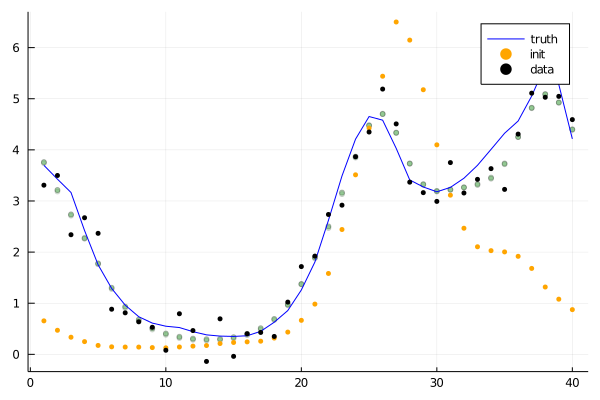

In [22]:
plt = scatter()
next_iteration = first_iteration
for i in 1:5
    display(minimum(next_iteration.optimized))
    display(hcat(next_iteration.result, true_params))
    next_iteration = mgvi_kl_optimize_step(rng, model, data, next_iteration.result;
        jacobian_func=FwdRevADJacobianFunc,
        residual_sampler=ImplicitResidualSampler,
        optim_options=Optim.Options(g_reltol=1E-2, g_abstol=1E-2))
    plot_iteration_light(next_iteration, i)
end
display(minimum(next_iteration.optimized))
display(hcat(next_iteration.result, true_params))

init_plots()
display(plt)

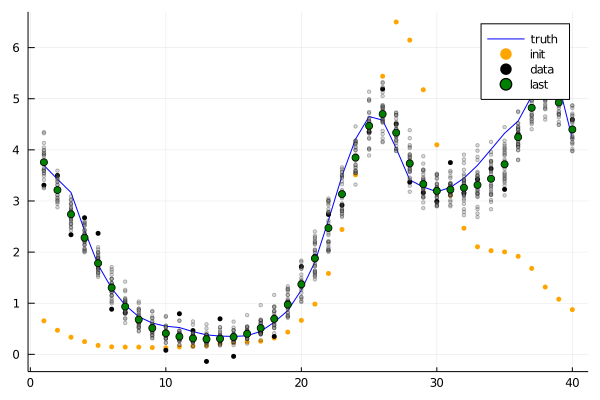

In [23]:
plot()
init_plots()
plot_iteration(next_iteration, "last")